# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

With the change in SAT format, how did it the change format changes the landscape of college exams?

Approach:
Does the change affects the participation rate? *increase/decrease?
Which states are most affected by the change? *up/down
How to improve, what makes SAT better than ACT? *harder? easier? which one is more useful?

Where should we market to students to increase the participation rate in a **state of your choice**.
How to market to students?

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import random as rand
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp
plt.style.use('fivethirtyeight')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

In [3]:
sat_2017.info()
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

1. Scores are recorded based on state averages for both SAT and ACT.
2. ACT has an additional national average row.
3. Although there are some overlaps, but it is safe to assume most participants take EITHER SAT or ACT and most states has a dominating test that the states favors.

#### 4a. Does the data look complete? 

No. SAT lacks the national average scores.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Yes. There are a few errors with the data.

SAT:
In Row 20: Math average for Maryland is 52.

Max/Min for the test
English: 200 - 800
Maths:   200 - 800
Overall: 400 - 1600

ACT:
In Row 21: Maryland: Science average is 2.3.
Row 51: Wyoming: Composit score is 20.2x.

Max/Min for the test
English    1-36
Maths      1-36
Reading    1-36
Science    1-36
Composite  1-36

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
print(sat_2017.dtypes)
print('')
print(act_2017.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Participation rates should be float instead of strings

Composite scores from act_2017 should be float instead of strings

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [7]:
sat_participation = sat_2017['Participation'].str.replace(r'%', r'.0').astype('float') / 100
sat_2017["sat_participation"] = sat_participation
sat_2017 = sat_2017.drop(['Participation'], axis=1)
sat_2017 = sat_2017[['State',
                     'sat_participation', 
                     'Evidence-Based Reading and Writing', 
                     'Math', 
                     'Total']]

act_participation = act_2017['Participation'].str.replace(r'%', r'.0').astype('float') / 100
act_2017["act_participation"] = act_participation
act_2017 = act_2017.drop(['Participation'], axis=1)
act_2017 = act_2017[['State', 
                     'act_participation', 
                     'English', 
                     'Math', 
                     'Reading','Science','Composite']]

- Fix any individual values preventing other columns from being the appropriate type.

In [8]:
sat_2017 = sat_2017.replace(to_replace = 52, value = 524)
act_2017 = act_2017.replace(to_replace = 2.3, value = 23.2)
act_2017 = act_2017.replace(to_replace = '20.2x', value = 20.2)

In [9]:
act_2017['Composite'] = pd.to_numeric(act_2017.Composite)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [10]:
print(sat_2017.columns)
print(act_2017.columns)

Index(['State', 'sat_participation', 'Evidence-Based Reading and Writing',
       'Math', 'Total'],
      dtype='object')
Index(['State', 'act_participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')


- Display the data types again to confirm they are correct.

In [11]:
print(sat_2017.dtypes)
print('')
print(act_2017.dtypes)

State                                  object
sat_participation                     float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State                 object
act_participation    float64
English              float64
Math                 float64
Reading              float64
Science              float64
Composite            float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [12]:
sat_2017 = sat_2017.rename(index=str, columns={"State": "state", 
                                               "sat_participation":"sat_part_17", 
                                               "Evidence-Based Reading and Writing": "sat_eng_17", 
                                               "Math" : "sat_math_17", 
                                               "Total":"sat_total_17"})
act_2017 = act_2017.rename(index=str, columns={"State": "state", 
                                               "act_participation":"act_part_17", 
                                               "English":"act_eng_17", 
                                               "Math" : "act_math_17", 
                                               "Reading":"act_read_17", 
                                               "Science" : "act_sci_17", 
                                               "Composite" : "act_comp_17" })

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|    Feature  |   Type  |  Dataset  |                 Description                         |
|-------------|---------|-----------|-----------------------------------------------------|
|state        | object  | SAT & ACT | A list of all 51 states in the US                   |
|sat_part_17  | float64 | SAT 2017  | Participation rate for SAT in each city in 2017     |
|sat_eng_17   | int64   | SAT 2017  | Average score for English in each state in 2017     |
|sat_math_17  | int64   | SAT 2017  | Average score for Maths in each state in 2017       |
|sat_total_17 | int64   | SAT 2017  | Average total score for SAT in each state in 2017   |
|act_part_17  | float64 | ACT 2017  | Participation rate for ACT in each city in 2017     |
|act_eng_17   | float64 | ACT 2017  | Average score for English in each state in 2017     |
|act_math_17  | float64 | ACT 2017  | Average score for Math in each state in 2017        |
|act_read_17  | float64 | ACT 2017  | Average score for Reading in each state in 2017     |
|act_sci_17   | float64 | ACT 2017  | Average score for Science in each state in 2017     |
|act_comp_17  | float64 | ACT 2017  | Average score for Composition in each state in 2017 |

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [13]:
act_2017 = act_2017.iloc[1:]

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [14]:
combined_2017 = sat_2017.merge(act_2017, how = 'outer', on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [15]:
combined_2017.to_csv("../data/combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

Source:

SAT Score by states 2018 :https://blog.prepscholar.com/average-sat-scores-by-state-most-recent

SAT Score by states 2018 : https://reports.collegeboard.org/sat-suite-program-results/state-results

ACT Participation 2018 :https://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf

ACT Score by states 2018 : https://magoosh.com/hs/act/2016/average-act-score-by-state/


In [16]:
#importing csv
combined_2018 = pd.read_csv('../data/combined_2018.csv') 

#check datatype for each coloumn, and consistency with combined_2017 in columns, entries
combined_2017.info() 
combined_2018.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
state           51 non-null object
sat_part_17     51 non-null float64
sat_eng_17      51 non-null int64
sat_math_17     51 non-null int64
sat_total_17    51 non-null int64
act_part_17     51 non-null float64
act_eng_17      51 non-null float64
act_math_17     51 non-null float64
act_read_17     51 non-null float64
act_sci_17      51 non-null float64
act_comp_17     51 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
state           51 non-null object
sat_part_18     51 non-null float64
sat_eng_18      51 non-null int64
sat_math_18     51 non-null int64
sat_total_18    51 non-null int64
act_part_18     51 non-null float64
act_eng_18      51 non-null float64
act_math_18     51 non-null float64
act_read_18     51 non-null float64
act_sci_18      51 non-nul

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [17]:
#combining both databases and exporting it to csv
final = combined_2017.merge(combined_2018, how = 'outer', on='state') 
final.to_csv("../data/final.csv") 

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [18]:
#rearrange the column titles
final = final[['state', 
               'sat_part_17', 
               'sat_part_18', 
               'sat_eng_17', 
               'sat_eng_18', 
               'sat_math_17', 
               'sat_math_18', 
               'sat_total_17', 
               'sat_total_18', 
               'act_part_17', 
               'act_part_18', 
               'act_eng_17', 
               'act_eng_18', 
               'act_math_17', 
               'act_math_18', 
               'act_read_17', 
               'act_read_18', 
               'act_sci_17', 
               'act_sci_18', 
               'act_comp_17', 
               'act_comp_18']]
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_part_17,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_part_18,51.0,0.466275,0.380142,0.02,0.045,0.52,0.795,1.0
sat_eng_17,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_eng_18,51.0,567.294118,45.317676,497.00,535.000,552.00,616.500,643.0
sat_math_17,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_math_18,51.0,557.470588,49.213963,480.00,521.500,547.00,600.500,655.0
sat_total_17,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
sat_total_18,51.0,1125.294118,94.442214,977.00,1062.500,1099.00,1229.500,1298.0
act_part_17,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_part_18,51.0,0.616471,0.340810,0.07,0.285,0.66,1.000,1.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [19]:
#function for sd
def stdev(x):
    mean = sum(x)/len(x)
    variance = sum([(i-mean)**2 for i in x]) / len(x)
    return (variance)**0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [20]:
sd = {s:stdev(final[s]) for s in list(final)[1:]}
print(sd)

{'sat_part_17': 0.3492907076664507, 'sat_part_18': 0.3763965409204987, 'sat_eng_17': 45.21697020437866, 'sat_eng_18': 44.87118561762388, 'sat_math_17': 46.65713364485503, 'sat_math_18': 48.72908417723463, 'sat_total_17': 91.58351056778743, 'sat_total_18': 93.51172603783118, 'act_part_17': 0.3182417575123181, 'act_part_18': 0.33745194881997503, 'act_eng_17': 2.3304876369363363, 'act_eng_18': 2.4222536143202795, 'act_math_17': 1.9624620273436781, 'act_math_18': 2.015707255555717, 'act_read_17': 2.0469029314842646, 'act_read_18': 2.145891884510421, 'act_sci_17': 1.7222161451443676, 'act_sci_18': 1.8516885484833543, 'act_comp_17': 2.000786081581989, 'act_comp_18': 2.0855261815801147}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

No.

SD from pandas assumes the data is from a sample, hence using the normaliser = 1/(n-1)

The manual SD and numpy's SD assumes the data set is the from popoulation data set, hence using the normaliser = 1/(n)

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [21]:
#2017 SAT
final[['state','sat_part_17']].sort_values(['sat_part_17'], ascending=False).head(10)
#Highest participation rates: Columbia, Michigan, Connecticut, Delaware - 100% New Hampshire 96%

final[['state','sat_part_17']].sort_values(['sat_part_17'], ascending=True).head(10)
#Lowest participation rates: North Dakota, Missisiippi, Lowa - 2% Missouri, Utah, South Dakota, Nebraska, Wisconsin, Minnesota,
#Wyoming, Arkansas - 3%

,state,sat_part_17
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
23,Minnesota,0.03
50,Wyoming,0.03


In [22]:
#2018 SAT
final[['state','sat_part_18']].sort_values(['sat_part_18'], ascending=False).head(10)
#Highest participation rates: Coloado, Michigan, Connecticut, Delaware, Idaho - 100%

final[['state','sat_part_18']].sort_values(['sat_part_18'], ascending=True).head(10)
#Lowest participation rates: North Dakota - 2% Wyoming, South Dakota, Nebraska, Wisconsin, Missisiippi, Lowa - 3%

,state,sat_part_18
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
24,Mississippi,0.03
15,Iowa,0.03
44,Utah,0.04
23,Minnesota,0.04
18,Louisiana,0.04


In [23]:
#2017 ACT
final[['state','act_part_17']].sort_values(['act_part_17'], ascending=False).head(18)
#Highest participation rates: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina,
#Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas - 100%

final[['state','act_part_17']].sort_values(['act_part_17'], ascending=True).head(10)
#Lowest participation rates: Maine - 8%, New Hampshire, Delaware - 18%, Rhode Island 21%, Pennsylvania 23%

,state,act_part_17
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23
20,Maryland,0.28
45,Vermont,0.29
21,Massachusetts,0.29
22,Michigan,0.29
46,Virginia,0.29


In [24]:
#2018 ACT
final[['state','act_part_18']].sort_values(['act_part_18'], ascending=False).head(20)
#Highest participation rates: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio*, North Carolina,
#Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, Arkansas - 100%

final[['state','act_part_18']].sort_values(['act_part_18'], ascending=True).head(10)
#Lowest participation rates: Maine - 7%, Rhode Island 15%, New Hampshire 16%, Delaware 17%,, Pennsylvania 20%

,state,act_part_18
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20
22,Michigan,0.22
47,Washington,0.24
45,Vermont,0.24
46,Virginia,0.24
21,Massachusetts,0.25


In [25]:
#highest and lowest mean total/composite scores

#2017 SAT
final[['state','sat_total_17']].sort_values(['sat_total_17'], ascending=False).head(10)
#Highest total score: Minnesota - 1295, Wisconsin - 1291, Lowa - 1275, Missouri - 1271, Kansas - 1260
final[['state','sat_total_17']].sort_values(['sat_total_17'], ascending=True).head(10)
#Lowest total score: Columbia - 950, Delaware - 996, Idaho - 1005, Michigan - 1005, Maine - 1012,

,state,sat_total_17
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012
9,Florida,1017
43,Texas,1020
6,Connecticut,1041
36,Oklahoma,1047
10,Georgia,1050


In [26]:
#2018 SAT
final[['state','sat_total_18']].sort_values(['sat_total_18'], ascending=False).head(10)
#Highest total score: Minnesota - 1298, Wisconsin - 1294, North Dakota - 1283, Lowa - 1265, Kansas - 1265
final[['state','sat_total_18']].sort_values(['sat_total_18'], ascending=True).head(10)
#Lowest total score: Columbia - 977, Delaware - 998, West Virginia - 999, Idaho - 1001, Michigan - 1011

,state,sat_total_18
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
22,Michigan,1011
19,Maine,1013
9,Florida,1014
39,Rhode Island,1018
13,Illinois,1019
5,Colorado,1025


In [27]:
#2017 ACT
final[['state','act_comp_17']].sort_values(['act_comp_17'], ascending=False).head(10)
#Highest composite score: New Hampshire - 25.5, Massachusetts - 25.4, Connecticut - 25.2, Maine - 24.3, Comlumbia - 24.2
final[['state','act_comp_17']].sort_values(['act_comp_17'], ascending=True).head(10)
#Lowest composite score: Nevada - 17.8 Mississippi - 18.6, South Carolina - 18.7, Hawaii - 19.0, North Carolina - 19.1

,state,act_comp_17
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1
0,Alabama,19.2
3,Arkansas,19.4
36,Oklahoma,19.4
18,Louisiana,19.5
2,Arizona,19.7


In [28]:
#2018 ACT
final[['state','act_comp_18']].sort_values(['act_comp_18'], ascending=False).head(10)
#Highest composite score: Connecticut - 25.6, Massachusetts - 25.5, New Hampshire - 25.1, New York - 24.5, Michigan - 24.4
final[['state','act_comp_18']].sort_values(['act_comp_18'], ascending=True).head(10)
#Lowest composite score: Nevada - 17.7, South Carolina - 18.3, Mississippi - 18.6, , Hawaii - 18.9, Alabama - 19.1, North Carolina - 19.1

,state,act_comp_18
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1
33,North Carolina,19.1
2,Arizona,19.2
18,Louisiana,19.2
36,Oklahoma,19.3
3,Arkansas,19.4


In [29]:
#Do any states with 100% participation on a given test have a rate change year-to-year?
#SAT
sat_part_delta = final[(final['sat_part_17'] == 1) & (final['sat_part_18']!=1)]
sat_part_delta[['state','sat_part_17','sat_part_18']]
#SAT: 2017 to 2018: Yes, decrease from 100% to 92%, District of Columbia

sat_part_delta2 = final[(final['sat_part_17'] != 1) & (final['sat_part_18']==1)]
sat_part_delta2[['state','sat_part_17','sat_part_18']]
#SAT: 2017 to 2018: increase from 11% from 100%, Colorado and increase from 93% to 100% Idaho

,state,sat_part_17,sat_part_18
5,Colorado,0.11,1.0
12,Idaho,0.93,1.0


In [30]:
#Do any states with 100% participation on a given test have a rate change year-to-year?
#ACT
act_part_delta = final[(final['act_part_17'] == 1) & (final['act_part_18']!=1)]
act_part_delta[['state','act_part_17','act_part_18']]
#ACT: 2017 to 2018: decrease from 100% (to 99%, Minnesota), (to 30%, Colorado)

act_part_delta2 = final[(final['act_part_17'] != 1) & (final['act_part_18']==1)]
act_part_delta2[['state','act_part_17','act_part_18']]
#ACT: 2017 to 2018: increase to 100% (from 75%, Ohio), (from 84%, Nebraska)

,state,act_part_17,act_part_18
27,Nebraska,0.84,1.0
35,Ohio,0.75,1.0


In [31]:
#Do any states show have >50% participation on both tests either year?
more_than_half = final[(final['sat_part_17']>0.5) & (final['sat_part_18']>0.5) & (final['act_part_17']>0.5) & (final['act_part_18']>0.5)]
more_than_half.iloc[:,0:11]
#Yes. Florida, Georgia, Hawaii

,state,sat_part_17,sat_part_18,sat_eng_17,sat_eng_18,sat_math_17,sat_math_18,sat_total_17,sat_total_18,act_part_17,act_part_18
9,Florida,0.83,0.97,520,522,497,493,1017,1014,0.73,0.66
10,Georgia,0.61,0.70,535,542,515,522,1050,1064,0.55,0.53
11,Hawaii,0.55,0.56,544,550,541,549,1085,1099,0.90,0.89


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

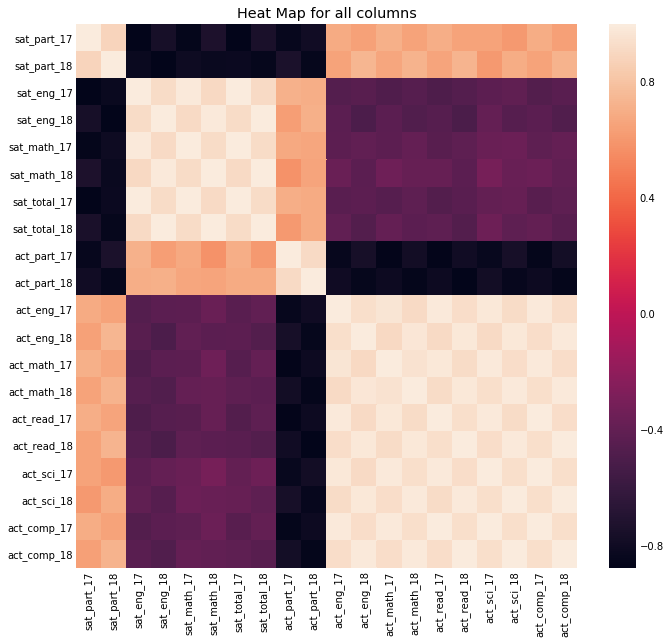

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(final.corr(), ax = ax, annot=False, annot_kws={"size": 20})

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

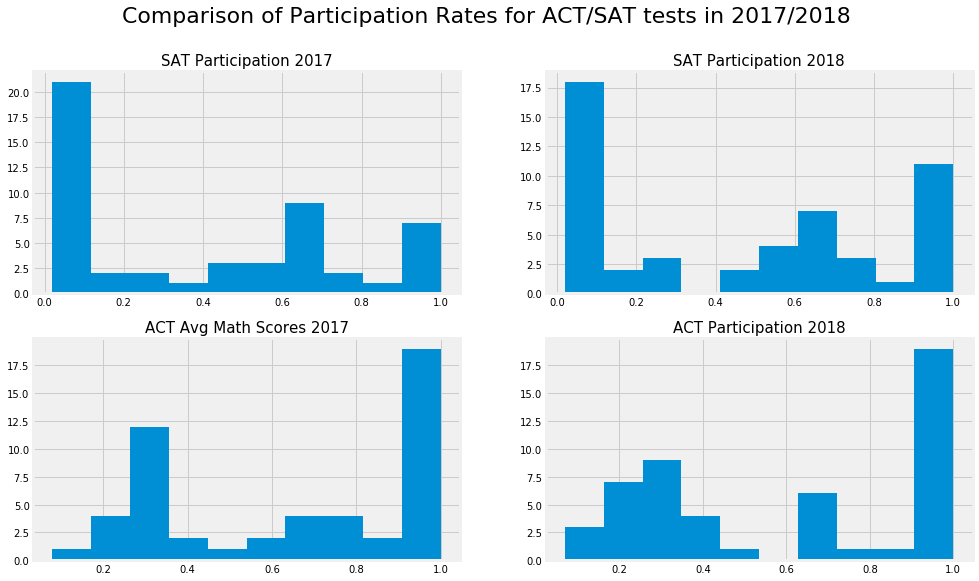

In [33]:
#test function
c = ['sat_part_17','sat_part_18','act_part_17','act_part_18']
t = ['SAT Participation 2017','SAT Participation 2018', 'ACT Avg Math Scores 2017','ACT Participation 2018']


def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,9)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=15)
    fig.suptitle("Comparison of Participation Rates for ACT/SAT tests in 2017/2018", fontsize=22)
   # Set titles, labels, etc here for each subplot

subplot_histograms(final,c,t,t)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

Text(0, 0.5, 'No. of states')

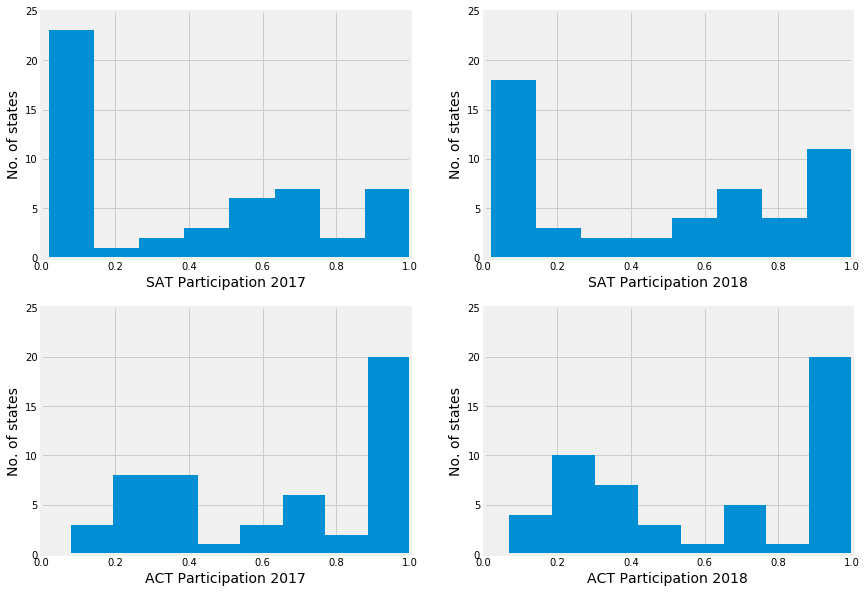

In [34]:
#Participation rates for SAT and ACT
%matplotlib inline
fig, (ax , ax2) = plt.subplots(2, 2, sharey = 'all' , figsize=(20,10))
b=8

ax = plt.subplot(231)
plt.hist(final['sat_part_17'], bins=b, label = 'Sat 2017')
ax.set_xlim(0,1)
ax.set_ylim(0,25)
ax.set_xlabel('SAT Participation 2017', fontsize = 14)
ax.set_ylabel('No. of states', fontsize= 14)

ax2 = plt.subplot(232)
plt.hist(final['sat_part_18'], bins=b, label = 'Sat 2018')
ax2.set_xlim(0,1)
ax2.set_ylim(0,25)
ax2.set_xlabel('SAT Participation 2018', fontsize = 14)
ax2.set_ylabel('No. of states', fontsize= 14)

ax3 = plt.subplot(234)
plt.hist(final['act_part_17'], bins=b, label = 'Act 2017')
ax3.set_xlim(0,1)
ax3.set_ylim(0,25)
ax3.set_xlabel('ACT Participation 2017', fontsize = 14)
ax3.set_ylabel('No. of states', fontsize= 14)

ax4 = plt.subplot(235)
plt.hist(final['act_part_18'], bins=b, label = 'Act 2018')
ax4.set_xlim(0,1)
ax4.set_ylim(0,25)
ax4.set_xlabel('ACT Participation 2018', fontsize = 14)
ax4.set_ylabel('No. of states', fontsize= 14)

Text(0, 0.5, 'No. of states')

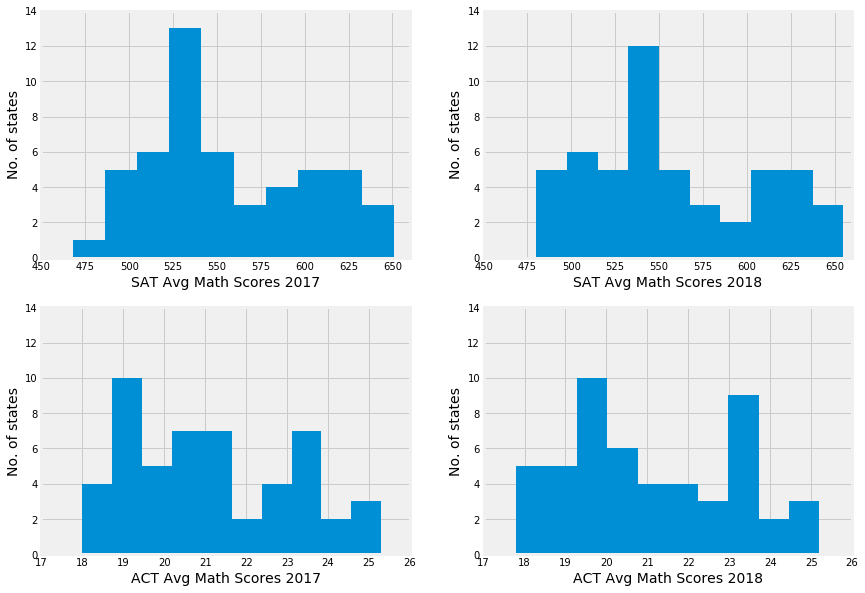

In [35]:
#Maths Score for SAT and ACT
%matplotlib inline
fig, (ax , ax2) = plt.subplots(2, 2, sharey = 'all' , figsize=(20,10))
b=10

ax = plt.subplot(231)
plt.hist(final['sat_math_17'], bins=b, label = 'Sat 2017')
ax.set_xlim(450,660)
ax.set_ylim(0,14)
ax.set_xlabel('SAT Avg Math Scores 2017', fontsize = 14)
ax.set_ylabel('No. of states', fontsize= 14)

ax2 = plt.subplot(232)
plt.hist(final['sat_math_18'], bins=b, label = 'Sat 2018')
ax2.set_xlim(450,660)
ax2.set_ylim(0,14)
ax2.set_xlabel('SAT Avg Math Scores 2018', fontsize = 14)
ax2.set_ylabel('No. of states', fontsize= 14)

ax3 = plt.subplot(234)
plt.hist(final['act_math_17'], bins=b, label = 'Act 2017')
ax3.set_xlim(17,26)
ax3.set_ylim(0,14)
ax3.set_xlabel('ACT Avg Math Scores 2017', fontsize = 14)
ax3.set_ylabel('No. of states', fontsize= 14)

ax4 = plt.subplot(235)
plt.hist(final['act_math_18'], bins=b, label = 'Act 2018')
ax4.set_xlim(17,26)
ax4.set_ylim(0,14)
ax4.set_xlabel('ACT Avg Math Scores 2018', fontsize = 14)
ax4.set_ylabel('No. of states', fontsize= 14)

Text(0, 0.5, 'No. of states')

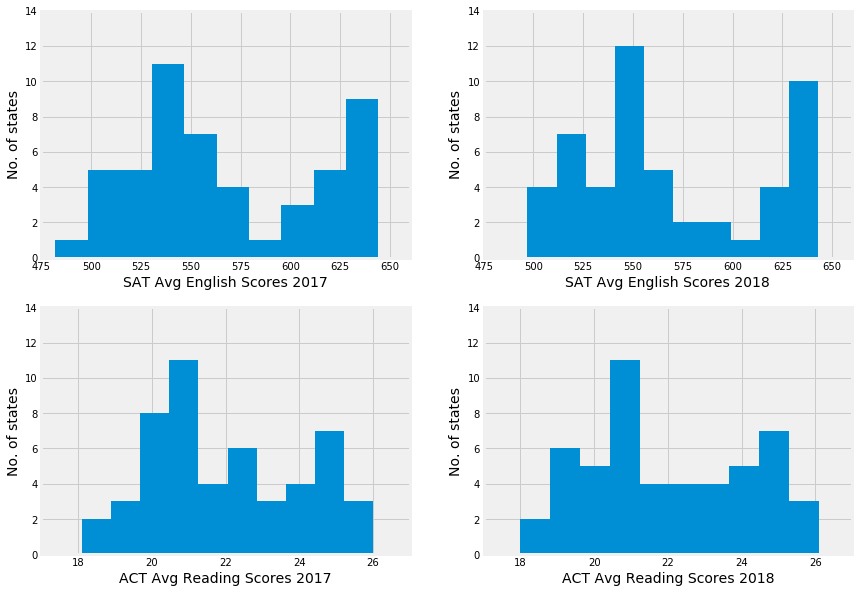

In [36]:
#English/Reading for SAT and ACT
%matplotlib inline
fig, (ax , ax2) = plt.subplots(2, 2, sharey = 'all' , figsize=(20,10))
b=10

ax = plt.subplot(231)
plt.hist(final['sat_eng_17'], bins=b, label = 'Sat 2017')
ax.set_xlim(475,660)
ax.set_ylim(0,14)
ax.set_xlabel('SAT Avg English Scores 2017', fontsize = 14)
ax.set_ylabel('No. of states', fontsize= 14)

ax2 = plt.subplot(232)
plt.hist(final['sat_eng_18'], bins=b, label = 'Sat 2018')
ax2.set_xlim(475,660)
ax2.set_ylim(0,14)
ax2.set_xlabel('SAT Avg English Scores 2018', fontsize = 14)
ax2.set_ylabel('No. of states', fontsize= 14)

ax3 = plt.subplot(234)
plt.hist(final['act_read_17'], bins=b, label = 'Act 2017')
ax3.set_xlim(17,27)
ax3.set_ylim(0,14)
ax3.set_xlabel('ACT Avg Reading Scores 2017', fontsize = 14)
ax3.set_ylabel('No. of states', fontsize= 14)

ax4 = plt.subplot(235)
plt.hist(final['act_read_18'], bins=b, label = 'Act 2018')
ax4.set_xlim(17,27)
ax4.set_ylim(0,14)
ax4.set_xlabel('ACT Avg Reading Scores 2018', fontsize = 14)
ax4.set_ylabel('No. of states', fontsize= 14)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0, 0.5, 'ACT Avg Maths Score 2017')

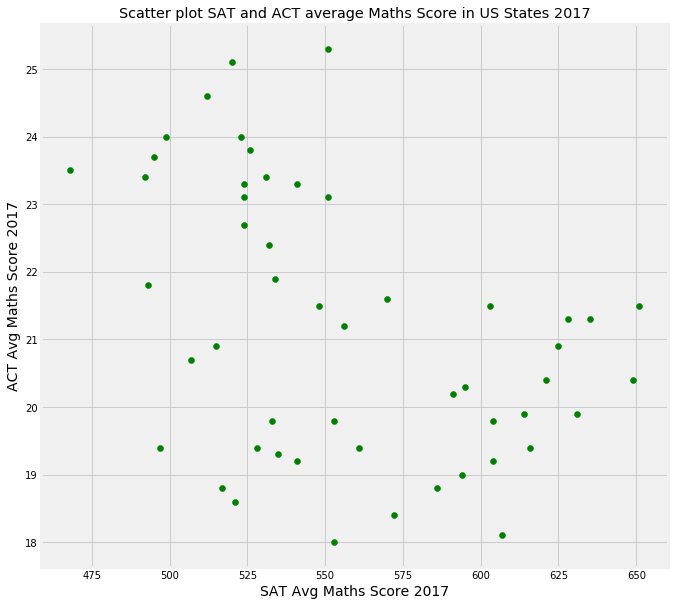

In [37]:
#Scatterplot for SAT and ACT maths score 2017
fig = plt.figure(figsize=(10,10))
plt.scatter(final['sat_math_17'], final['act_math_17'] , c = 'green')
plt.title('Scatter plot SAT and ACT average Maths Score in US States 2017')
plt.xlabel('SAT Avg Maths Score 2017', fontsize = 14)
plt.ylabel('ACT Avg Maths Score 2017', fontsize= 14)

Text(0, 0.5, 'ACT Avg Reading Score 2017')

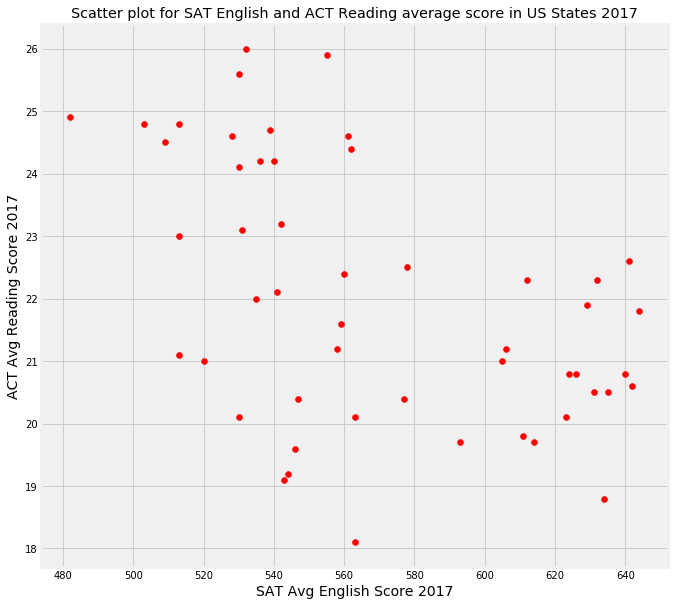

In [38]:
#Scatterplot for SAT verbal and ACT reading score 2017
fig = plt.figure(figsize=(10,10))
plt.scatter(final['sat_eng_17'], final['act_read_17'] , c = 'red')
plt.title('Scatter plot for SAT English and ACT Reading average score in US States 2017')
plt.xlabel('SAT Avg English Score 2017', fontsize = 14)
plt.ylabel('ACT Avg Reading Score 2017', fontsize= 14)

Text(0, 0.5, 'ACT Avg Composite Score 2017')

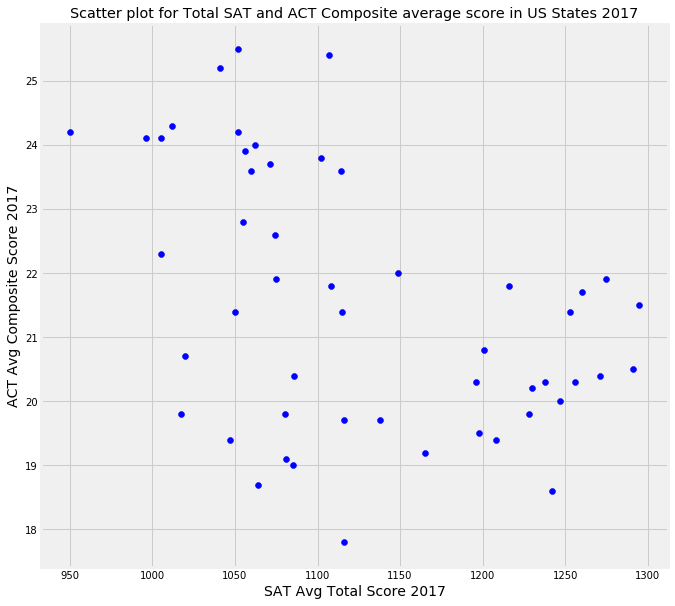

In [39]:
#Scatterplot for SAT total and ACT Comp for 2017
fig = plt.figure(figsize=(10,10))
plt.scatter(final['sat_total_17'], final['act_comp_17'] , c = 'blue')
plt.title('Scatter plot for Total SAT and ACT Composite average score in US States 2017')
plt.xlabel('SAT Avg Total Score 2017', fontsize = 14)
plt.ylabel('ACT Avg Composite Score 2017', fontsize= 14)

Text(0, 0.5, 'SAT Total Avg Score 2018')

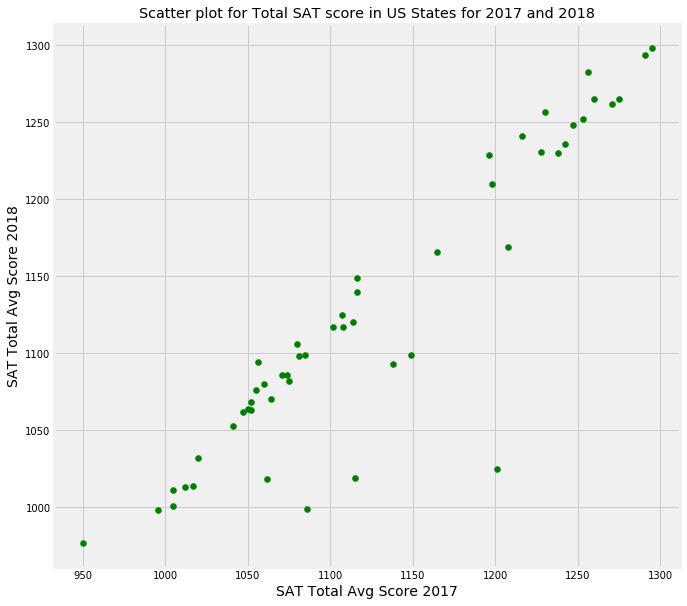

In [40]:
#Scatterplot for Total SAT score 2017,2018
fig = plt.figure(figsize=(10,10))
plt.scatter(final['sat_total_17'], final['sat_total_18'] , c = 'green')
plt.title('Scatter plot for Total SAT score in US States for 2017 and 2018')
plt.xlabel('SAT Total Avg Score 2017', fontsize = 14)
plt.ylabel('SAT Total Avg Score 2018', fontsize= 14)

Text(0, 0.5, 'ACT Avg Composite Score 2018')

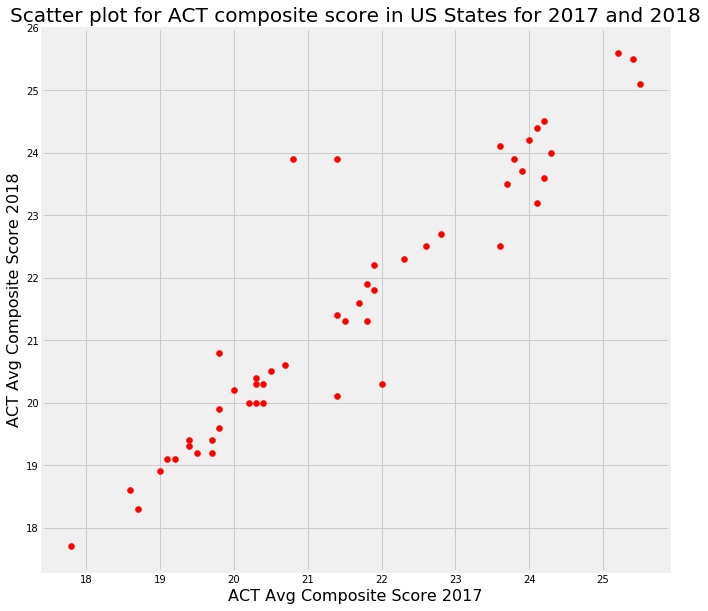

In [41]:
#Scatterplot for ACT composite score 2017,2018
fig = plt.figure(figsize=(10,10))
plt.scatter(final['act_comp_17'], final['act_comp_18'] , c = 'Red')
plt.title('Scatter plot for ACT composite score in US States for 2017 and 2018',fontsize = 20)
plt.xlabel('ACT Avg Composite Score 2017', fontsize = 16)
plt.ylabel('ACT Avg Composite Score 2018', fontsize= 16)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

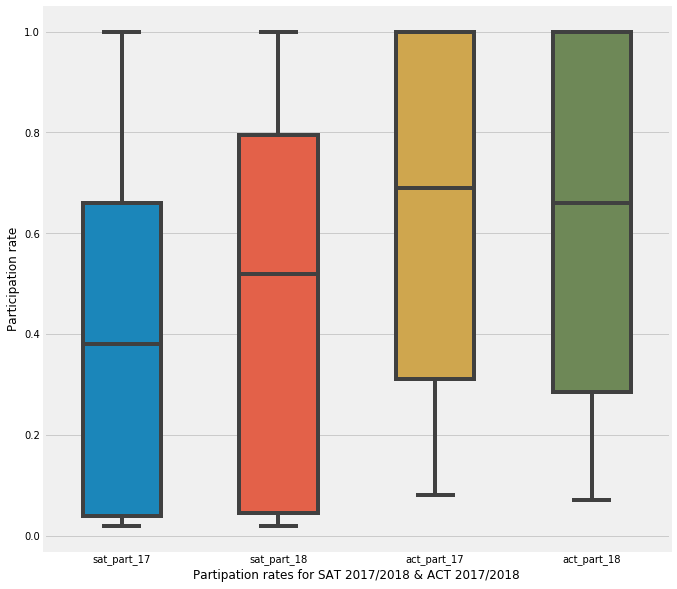

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(data = final, order = ['sat_part_17','sat_part_18','act_part_17','act_part_18'], 
                 orient = 'v', width = 0.5, fliersize = 10).set(
    xlabel='Partipation rates for SAT 2017/2018 & ACT 2017/2018', ylabel='Participation rate')

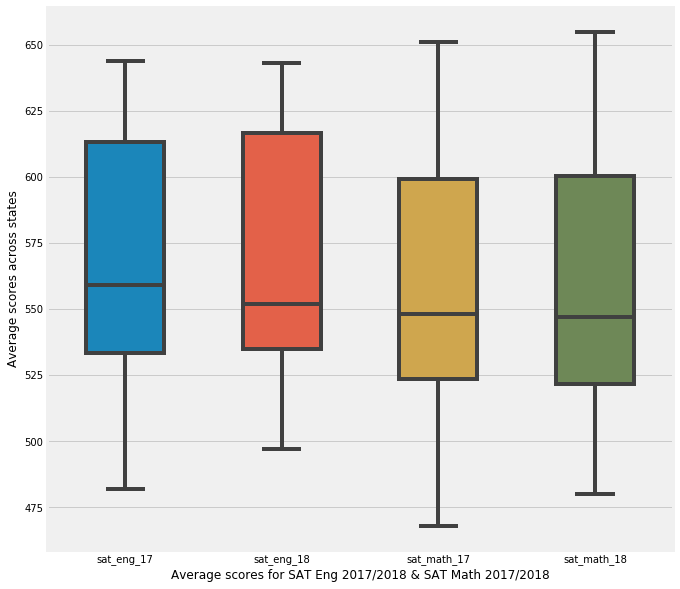

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(data = final, order = ['sat_eng_17','sat_eng_18','sat_math_17','sat_math_18'], 
                 orient = 'v', width = 0.5, fliersize = 10).set(
    xlabel='Average scores for SAT Eng 2017/2018 & SAT Math 2017/2018' , ylabel='Average scores across states')

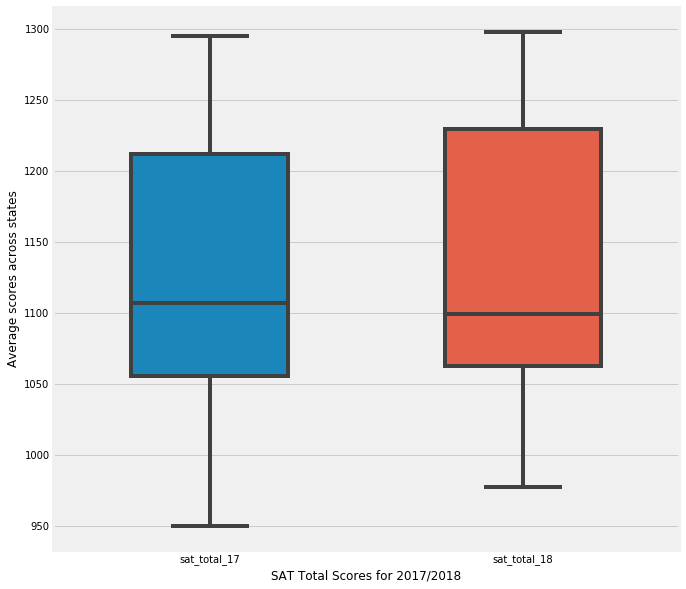

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(data = final, order=['sat_total_17','sat_total_18'], 
                 orient = 'v', width = 0.5, fliersize = 10).set(
    xlabel='SAT Total Scores for 2017/2018' , ylabel='Average scores across states')

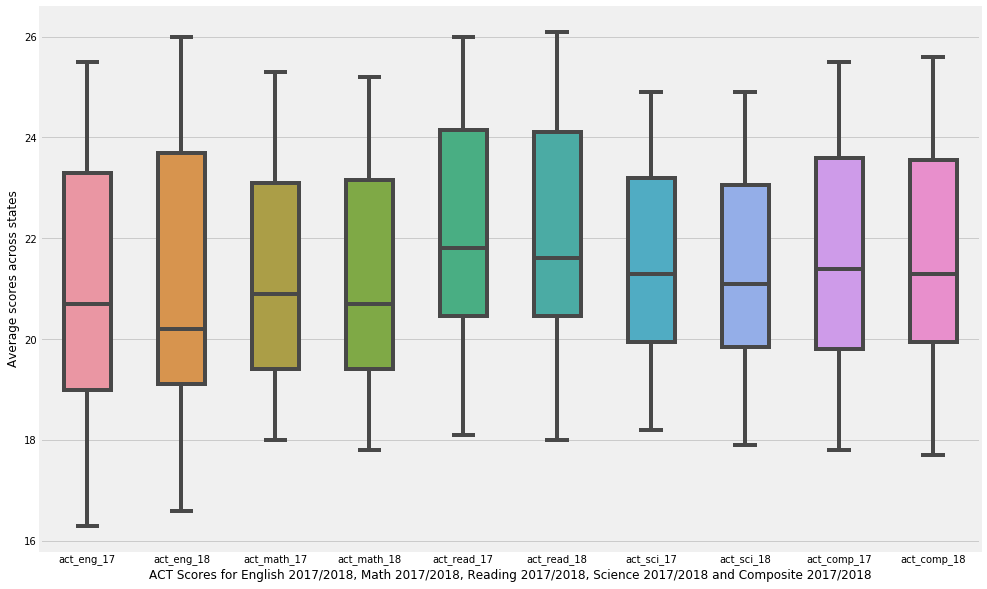

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(data = final, order = ['act_eng_17',
                                        'act_eng_18', 
                                        'act_math_17', 
                                        'act_math_18', 
                                        'act_read_17', 
                                        'act_read_18', 
                                        'act_sci_17', 
                                        'act_sci_18', 
                                        'act_comp_17', 
                                        'act_comp_18'], 
                 orient = 'v', width = 0.5, fliersize = 10).set(
    xlabel='ACT Scores for English 2017/2018, Math 2017/2018, Reading 2017/2018, Science 2017/2018 and Composite 2017/2018', 
    ylabel='Average scores across states')
              

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

#not Tableau, but heat map based on US states nonetheless:
#sat participation heatmap
('../screenshots/sat_2017.png')
('../screenshots/sat_2018.png')
('../screenshots/sat_part.gif')

#act participation heatmap
('../screenshots/act_2017.png')
('../screenshots/act_2018.png')
('../screenshots/act_part.gif')

#act vs sat participation heatmap
('../screenshots/actvsat_2017.png')
('../screenshots/actvsat_2018.png')
('../screenshots/sat_act_part.gif')

#sat 17 vs sat 18 participation heatmap
('../screenshots/sat_17v18.png')
#act 17 vs act 18 participation heatmap
('../screenshots/act_17v18.png')

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

1. SAT Participation 2017, 2018:

The National participation average rose from 40% to 47% and median rose from 38% to 52%.

Since, average < median, this suggest that SAT has gained participation from states that are from the middle percentiles while the bottom states remained unchanged. 

This is further supported by each quartile's performance within the participation rates.
Q1,Q2,Q3 in 2018 performed better than 2017.

In terms of distribution, both set of datas seem right-skewed

2. ACT Participation 2017, 2018:

The National participation average decreased from 65% to 61%

While participation has decreased slightly, the test retains it's importance in existing states as states in the 75th percentile and above retains 100% participation in these states.

In terms of distribution, both set of datas seem left-skewed

3. SAT English, Maths and Total scores 2017 and 2018:

From the plots above, it has been proven that SAT's participation rates and scores from each components correlates negatively. Despite this prior knowledge, the scores from 2017 to 2018 only declined marginally.

English:

.mean decreased slightly from 569 to 567

.median had decreased from 559 to 552

.since the gap between mean and median is now slightly wider, the distribution leans slightly away from normal distribution

Maths:

.mean rose from 556 to 557

.median maintained from 548 to 547

Total:

.mean maintained from 1126 to 1125

.median decreased slightly from 1107 to 1099

.since the gap between mean and median is now slightly wider, the distribution leans slightly away from normal distribution

SAT English,Maths,Total scores - close to normal distribution, but peak slightly towards the left

4. ACT English, Maths, Reading, Science and Composite scores 2017 and 2018:

Simailar to SAT scores, the negative correlation would mean that scores in ACT should see an increase.
However, scores seem undisturbed from previous year

English:

.mean and median remained the same at 20
Maths:

.mean remained the same at 21, median at 20
Reading:

.mean remained at 22, median at 21
Science

.mean at 21, median 21
Composite

.mean at 21, median 21

In terms of distribution, data seem to be normally distributed

In [46]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_part_17,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_part_18,51.0,0.466275,0.380142,0.02,0.045,0.52,0.795,1.0
sat_eng_17,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_eng_18,51.0,567.294118,45.317676,497.00,535.000,552.00,616.500,643.0
sat_math_17,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_math_18,51.0,557.470588,49.213963,480.00,521.500,547.00,600.500,655.0
sat_total_17,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
sat_total_18,51.0,1125.294118,94.442214,977.00,1062.500,1099.00,1229.500,1298.0
act_part_17,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_part_18,51.0,0.616471,0.340810,0.07,0.285,0.66,1.000,1.0


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Yes, scores from each states generally follows the same distribution, close to normal distribution 
(or log-normal distribution)

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: Yes, the assumption holds for both math and reading as their mean and median are close to each other. It also holds true for all components in SAT and ACT test. 

Distribution for rates on both test follows a non normal distribution (either continuous bernoulli distribution or log normal distribution) as there are a high level dependency between states taking SAT or ACT despite slightly overlapping (ie. students taking both tests).

Better gauge of distributions will help minimise the error of the predictions, allow the algorithm converge properly and hence reduce cost.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Yes. From the scatterplots, we understand that they are negatively correlated which coincides with the information and research we have derived. The current sample size of n=51 will allow us to either test the national relationship between the two tests or go deeper test this within the state itself.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

No. From the scatterplots, we understand that they have low correlation. In addition, SAT and ACT test takers are mostly mutally exclusive with very little overlaps in each state. Hence, the a maths result from SAT will be independent from one in ACT. Therefore, it would neither help in understanding the paricipation rates of both tests, nor any new relationships of the maths score in both tests

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Within the dataset, we will test if there are significant differences
in the partipation rates for:
    1. SAT 2017 vs SAT 2018
    2. ACT 2017 vs ACT 2018
    
    Test 1: 
        H0: sat_part_17 = sat_part_18
        H1: sat_part_17 != sat_part_18
            
    Test 2:
        H0: act_part_17 = act_part_18
        H1: act_part_17 != act_part_18

In [47]:
#Test 1 - for SAT Participation
print(stats.ttest_ind(final['sat_part_17'],final['sat_part_18']))

#Test 2 - for ACT Participation
print(stats.ttest_ind(final['act_part_17'],final['act_part_18']))


Ttest_indResult(statistic=-0.9396299045734352, pvalue=0.34967156915092745)
Ttest_indResult(statistic=0.5499970052081805, pvalue=0.5835477949005085)


At 5% significance level,
Test 1:
    p < alpha, therefore reject null hypothesis. 
    The average participation rate for SAT 2017 is significantly different from SAT 2018.
    
Test 2:
    p > alpha, therefore do not reject null hypothesis.
    The average participation rate for ACT 2017 is NOT significantly different from ACT 2018.

Conclusion: The change in format and other background causes significantly changed the participation rates 
    for SAT from 2017 to 2018. However, this change does not seem to affect ACT as their change from
    2017 to 2018 is not statistically significant.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [48]:
#Only using the participation rates from both test 
combined_part = final.iloc[:,0:11]
combined_part['sat_diff'] = combined_part['sat_part_18']-combined_part['sat_part_17']
combined_part['act_diff'] = combined_part['act_part_18']-combined_part['act_part_17']

In [49]:
#To find out which ACT states declined rapidly
combined_part[['state','act_part_17','act_part_18','act_diff']].sort_values('act_diff',ascending=True).head()
#Illinois, Colorado

,state,act_part_17,act_part_18,act_diff
5,Colorado,1.00,0.30,-0.70
13,Illinois,0.93,0.43,-0.50
1,Alaska,0.65,0.33,-0.32
22,Michigan,0.29,0.22,-0.07
9,Florida,0.73,0.66,-0.07


In [50]:
#Do any states show have >50% participation on both tests either year?
more_than_half = final[(final['sat_part_17']>0.5) & (final['sat_part_18']>0.5) & (final['act_part_17']>0.5) & (final['act_part_18']>0.5)]
more_than_half[['state','sat_part_17','sat_part_18','act_part_17','act_part_18']]
#Yes. Florida, Georgia, Hawaii

#Any states with less than half for both years
less_than_half = final[(final['sat_part_17']<0.5) & (final['sat_part_18']<0.5) & (final['act_part_17']<0.5) & (final['act_part_18']<0.5)]
less_than_half[['state','sat_part_17','sat_part_18','act_part_17','act_part_18']]
#Oregon

,state,sat_part_17,sat_part_18,act_part_17,act_part_18
37,Oregon,0.43,0.48,0.4,0.42


In [51]:
#Hugest shift SAT :                     Illinois and Colorado
#Both test more than 50% in both years: Florida, Georgia, Hawaii
#Both test less than 50% in both years: Oregon

In [52]:
#including some outside research for the conclusion below
#importing an extended database with 2017 GDP per capita by US states 2018
final_plus = pd.read_csv('../data/final_plus.csv')

Text(0, 0.5, 'GDP Per Capita 2018')

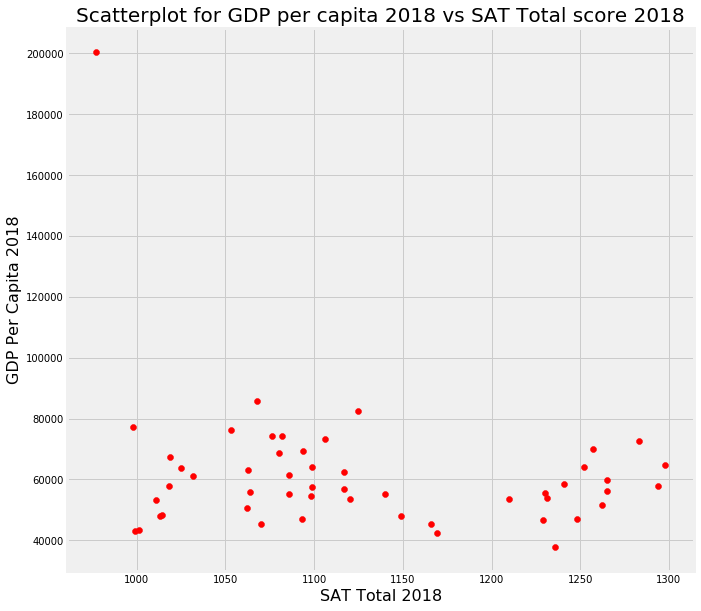

In [53]:
#Scatterplot for GDP per capita 2018 vs SAT Total score 2018
fig = plt.figure(figsize=(10,10))
plt.scatter(final_plus['sat_total_18'], final_plus['gdp_per_captial'] , c = 'Red')
plt.title('Scatterplot for GDP per capita 2018 vs SAT Total score 2018',fontsize = 20)
plt.xlabel('SAT Total 2018', fontsize = 16)
plt.ylabel('GDP Per Capita 2018', fontsize= 16)

In [54]:
final_plus.drop('Unnamed: 0', axis=1, inplace=True)
final_plus.drop(8, axis=0, inplace=True)
#dropping outlier row in this file to test this again.

Text(0, 0.5, 'GDP Per Capita 2018')

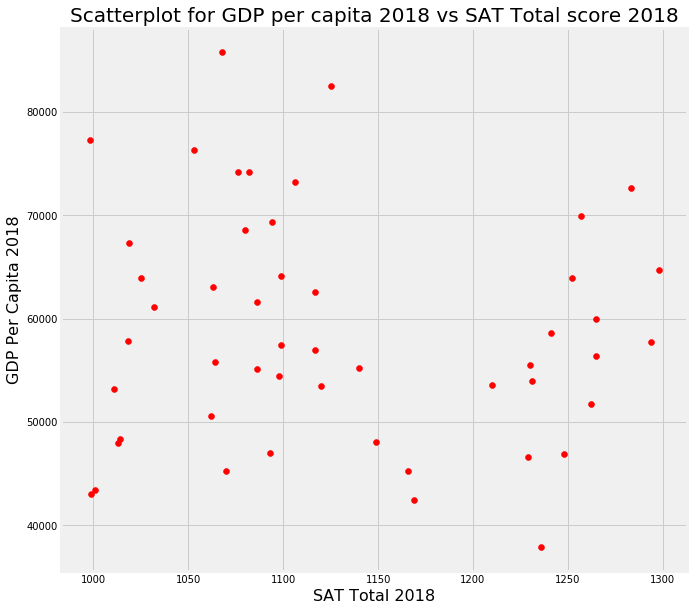

In [55]:
#Scatterplot for GDP per capita 2018 vs SAT Total score 2018
fig = plt.figure(figsize=(10,10))
plt.scatter(final_plus['sat_total_18'], final_plus['gdp_per_captial'] , c = 'Red')
plt.title('Scatterplot for GDP per capita 2018 vs SAT Total score 2018',fontsize = 20)
plt.xlabel('SAT Total 2018', fontsize = 16)
plt.ylabel('GDP Per Capita 2018', fontsize= 16)

Text(0, 0.5, 'GDP Per Capita 2018')

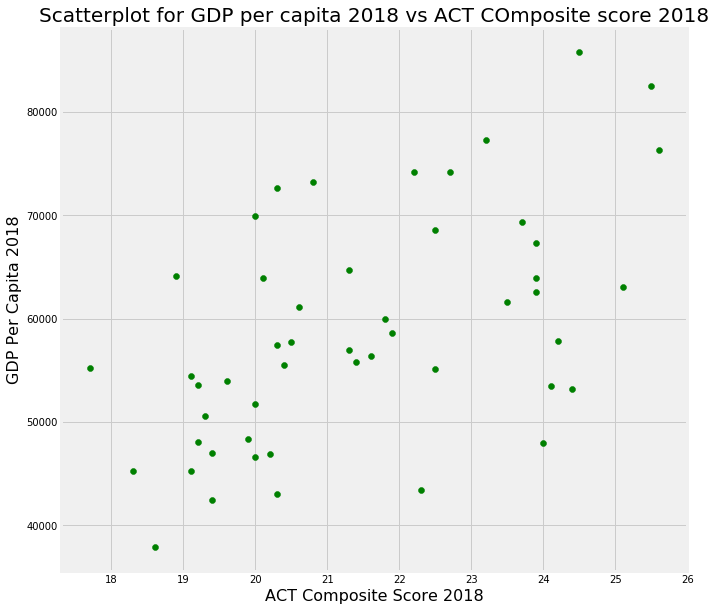

In [56]:
#Scatterplot for GDP per capita 2018 vs ACT Composite score 2018
fig = plt.figure(figsize=(10,10))
plt.scatter(final_plus['act_comp_18'], final_plus['gdp_per_captial'] , c = 'Green')
plt.title('Scatterplot for GDP per capita 2018 vs ACT COmposite score 2018',fontsize = 20)
plt.xlabel('ACT Composite Score 2018', fontsize = 16)
plt.ylabel('GDP Per Capita 2018', fontsize= 16)

Based on the analysis below, here are the 3 states of interest:
    
*Illinois*, a state where ACT participation declined drastically from 100% to 30%.
This is due to the colleage board winnng a $14.3m bid to give it's exam to all public high school graduates.[1]

*Florida*, a state where there are more than 50% of participants from both test papers.
Florida has their own "Florida Standards Assessments" which is deemed to be more difficult than both papers
and hence there are no policies for students to take either SAT or ACT.[2]

Given the fact that most colleges and universities uses either SAT or ACT as an entry requirement, it would be
advantages for students of Florida to take either or both papers since it is deemed easier than Florida Standard
Assessments and also helps them applies for schools outside of Florida.[3]


*Oregon*, a state where there are less than 50% of participants from both test papers.
In general, Oregon has a relatively low GDP per capita, and it has been linked with low test results in this state.
Preliminary research suggest that the population there less likely to enter colleges and universities.[4][5]

Although unconclusive, GDP per capita seems to correlate strongly with ACT Composite scores but not with SAT scores.
(From further plots and research above)

In addition, policies from each state will determine which paper has higher participation in the state:[6]

There are 11 states that require the ACT:
Alabama, 
Hawaii, 
Kentucky, 
Mississippi, 
Montana, 
Nebraska, 
Nevada, 
North Carolina, 
Utah, 
Wisconsin, 
Wyoming 

And there are 10 states/regions that require the SAT:
Colorado, 
Connecticut, 
Delaware, 
District of Columbia, 
Illinois, 
Maine, 
Michigan, 
New Hampshire, 
Rhode Island, 
West Virginia 



Sources:

[1]https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html

[2]https://www.orlandosentinel.com/news/education/os-act-sat-fsa-florida-tests-20180104-story.html

[3]https://www.nytimes.com/2013/08/04/education/edlife/more-students-are-taking-both-the-act-and-sat.html

[4]https://www.opb.org/news/article/oregon-schools-students-test-scores-2018-2017/

[5]https://en.wikipedia.org/wiki/List_of_U.S._states_by_GDP_per_capita#Map

[6]https://blog.prepscholar.com/act-vs-sat

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Key takeaways:
1. Participation rates between the two tests are negatively correlated. A high participation score for one test 
in a state is likely to result in low participation in another test.

2. Stronghold states for a test is likely due to a government policy and it is unlikely to be changed in the 
short term.

3. Scores are slightly negatively correlated with participation rates. The higher average scores are derived from
lower participation rates from each state for both tests.

Recommendations:
1. Target recommendation: Alaska
2. From 17 to 18: ACT participation dropped from 65% to 33%, however SAT increased from 38% to 43%
3. Alaska has high school test called PEAKS but there isnt any exit exam,
the College Board will then be able to enter and promote the test by:[1]

    a) Showing that elite school students usually take SAT [2]
    
    b) SAT is arguably better than ACT [3]
    
    c) SAT's growing presence in the West coast makes SAT more relevant
    

Source:
[1]https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html

[2]https://archive.nytimes.com/www.nytimes.com/interactive/2013/08/04/education/edlife/where-the-sat-and-act-dominate.html

[3]https://www.studyusa.com/en/a/1305/act-vs-sat-ultimate-guide-to-choosing-the-right-test

In [57]:
print(final.iloc[1,:])

state           Alaska
sat_part_17       0.38
sat_part_18       0.43
sat_eng_17         547
sat_eng_18         562
sat_math_17        533
sat_math_18        544
sat_total_17      1080
sat_total_18      1106
act_part_17       0.65
act_part_18       0.33
act_eng_17        18.7
act_eng_18        19.8
act_math_17       19.8
act_math_18       20.6
act_read_17       20.4
act_read_18       21.6
act_sci_17        19.9
act_sci_18        20.7
act_comp_17       19.8
act_comp_18       20.8
Name: 1, dtype: object


Text(0, 0.5, 'GDP Per Capita 2018')

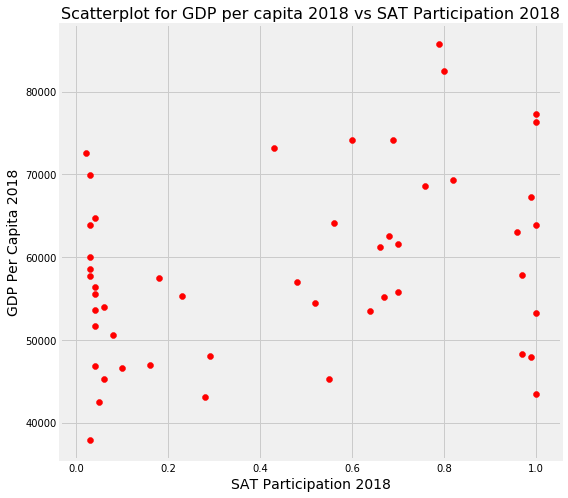

In [58]:
#Scatterplot for GDP per capita 2018 vs SAT Participation 2018
fig = plt.figure(figsize=(8,8))
plt.scatter(final_plus['sat_part_18'], final_plus['gdp_per_captial'] , c = 'Red')
plt.title('Scatterplot for GDP per capita 2018 vs SAT Participation 2018',fontsize = 16)
plt.xlabel('SAT Participation 2018', fontsize = 14)
plt.ylabel('GDP Per Capita 2018', fontsize= 14)